In [1]:
from datasets.data_loader import *
from networks.network import *
from networks.lopez17cnn import *
import torch
from datasets.exemplars_dataset import ExemplarsDataset
from MulticoreTSNE import MulticoreTSNE
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd
import os
from sklearn.metrics import precision_recall_fscore_support
import json
from glob import glob
import utils
from time import process_time_ns as process_time

In [2]:
torch.multiprocessing.set_sharing_strategy('file_system')

results_path = '/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/aws_results/'
exp_dir = 'mirage_generic_bic_39_1_base39_incr1_stop2/'
fns = glob(results_path + exp_dir + 'models/task1-*.ckpt')
fn = fns[-1]

os.chdir('/home/giampaolo/facil-tc/src/')

base_model = torch.load(fn, map_location='cpu')
ts = fn.split('-')[-1].replace('.ckpt', '')
args = json.loads(open(results_path + exp_dir + 'args-%s.txt' % ts).read())
stdout = open(results_path + exp_dir + 'stdout-%s.txt' % ts).readlines()
class_order = eval([v for v in stdout[:10] if 'Class order' in v][0].split(':')[-1])

utils.seed_everything(seed=args['seed'])

os.chdir('datasets/')
trn_load, val_load, tst_load, taskcla = get_loaders(
    datasets=args['datasets'], num_tasks=args['num_tasks'], nc_first_task=args['nc_first_task'],
    nc_incr_tasks=args['nc_incr_tasks'], batch_size=args['batch_size'], num_workers=args['num_workers'],
    pin_memory=args['pin_memory'], validation=.1, num_bytes=args['num_bytes'],
    num_pkts=args['num_pkts'], fields=args['fields'], seed=args['seed'], shots=-1,
    fseed=-1, last_class=args['last_class'], predict_tasks=False,
    statistical=False, is_ml=False)
os.chdir('../')

Class order:  [4, 25, 17, 33, 27, 16, 8, 32, 21, 0, 20, 34, 13, 14, 18, 11, 26, 15, 9, 31, 1, 19, 30, 3, 38, 36, 7, 12, 37, 23, 24, 2, 6, 35, 10, 28, 5, 22, 29, 39]


In [3]:
oldweight = np.linalg.norm(base_model['heads.0.weight'].numpy(), axis=1)
# oldweight = np.mean(old_model['heads.0.weight'].numpy(), axis=1)
oldbias = old_model['heads.0.bias'].numpy()

newweight = np.linalg.norm(base_model['heads.1.weight'].numpy(), axis=1)
# newweight = np.mean(base_model['heads.1.weight'].numpy(), axis=1)
newbias = base_model['heads.1.bias'].numpy()

gammaweight = np.mean(oldweight) / np.mean(newweight)
gammabias = np.mean(oldbias) / np.mean(newbias)

print(gammaweight, gammabias)

NameError: name 'old_model' is not defined

NameError: name 'newweight' is not defined

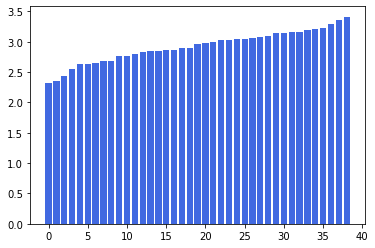

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(x=range(39), height=sorted(oldweight), color='royalblue')
ax.bar(x=[39], height=newweight, color='firebrick')

fig.show()

fig, ax = plt.subplots()

ax.bar(x=range(39), height=sorted(oldweight), color='royalblue')
ax.bar(x=[39], height=newweight * gammaweight, color='firebrick')

fig.show()

fig, ax = plt.subplots()

ax.bar(x=range(39), height=sorted(oldbias), color='royalblue')
ax.bar(x=[39], height=newbias, color='firebrick')

fig.show()

fig, ax = plt.subplots()

ax.bar(x=range(39), height=sorted(oldbias), color='royalblue')
ax.bar(x=[39], height=newbias * gammabias, color='firebrick')

fig.show()

In [ ]:
oldweight = np.mean(base_model['heads.0.weight'].numpy(), axis=1)
# oldweight = np.mean(base_model['heads.0.weight'].numpy(), axis=1)
# oldbias = base_model['heads.0.bias'].numpy()

newweight = np.mean(base_model['heads.1.weight'].numpy(), axis=1)
# newweight = np.mean(base_model['heads.1.weight'].numpy(), axis=1)
# newbias = base_model['heads.1.bias'].numpy()

gammaweight = np.mean(oldweight) / np.mean(newweight)
# gammabias = np.mean(oldbias) / np.mean(newbias)

# print(gammaweight, gammabias)

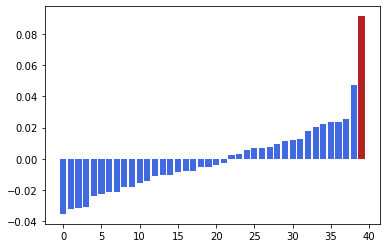

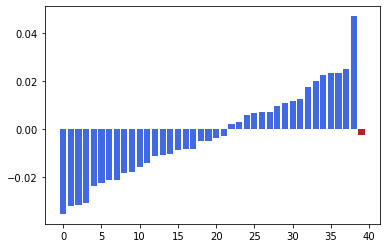

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.bar(x=range(39), height=sorted(oldweight), color='royalblue')
ax.bar(x=[39], height=newweight, color='firebrick')

fig.show()

fig, ax = plt.subplots()

ax.bar(x=range(39), height=sorted(oldweight), color='royalblue')
ax.bar(x=[39], height=newweight * gammaweight, color='firebrick')

fig.show()

In [ ]:
results_path = '/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/aws_results/'
exp_dir = 'mirage_generic_bic_39_1_base39_incr1_stop2/'
fns = glob(results_path + exp_dir + 'models/task1-*.ckpt')
fn = fns[-1]

os.chdir('/home/giampaolo/facil-tc/src/')

base_model = torch.load(fn, map_location='cpu')
ts = fn.split('-')[-1].replace('.ckpt', '')
args = json.loads(open(results_path + exp_dir + 'args-%s.txt' % ts).read())
stdout = open(results_path + exp_dir + 'stdout-%s.txt' % ts).readlines()
class_order = eval([v for v in stdout[:10] if 'Class order' in v][0].split(':')[-1])

utils.seed_everything(seed=args['seed'])

os.chdir('datasets/')
trn_load, val_load, tst_load, taskcla = get_loaders(
    datasets=args['datasets'], num_tasks=args['num_tasks'], nc_first_task=args['nc_first_task'],
    nc_incr_tasks=args['nc_incr_tasks'], batch_size=args['batch_size'], num_workers=args['num_workers'],
    pin_memory=args['pin_memory'], validation=.1, num_bytes=args['num_bytes'],
    num_pkts=args['num_pkts'], fields=args['fields'], seed=args['seed'], shots=-1,
    fseed=-1, last_class=args['last_class'], predict_tasks=False,
    statistical=False, is_ml=False)
os.chdir('../')

model = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)

net = LLL_Net(model, remove_existing_head=True, modality='all', activate_features=True)
net.add_head(num_outputs=39)
net.add_head(num_outputs=1)
net.load_state_dict(base_model)

true = [class_order.index(l) for tl in tst_load for l in tl.dataset.labels]

net.eval()
preds = torch.concat(net(torch.Tensor(np.concatenate([tl.dataset.images for tl in tst_load]))), axis=1)
preds = np.array([p.detach().numpy()[class_order] for p in preds]).argmax(-1)
precision, recall, fscore, support = precision_recall_fscore_support(true, preds)

print('precision', 'old: %.2f' % (np.mean(precision[:39]) * 100), 'new: %.2f' % (precision[39] * 100))
print('recall', 'old: %.2f' % (np.mean(recall[:39]) * 100), 'new: %.2f' % (recall[39] * 100))
print('fscore', 'old: %.2f' % (np.mean(fscore[:39]) * 100), 'new: %.2f' % (fscore[39] * 100))
print('support', 'old: %.2f' % (np.mean(support[:39])), 'new: %.2f' % (support[39]))
print('balanced accuracy', 'all: %.2f' % (np.mean(recall) * 100))
print('fscore', 'all: %.2f' % (np.mean(fscore) * 100))

from copy import deepcopy as copy

wa_model = copy(base_model)

# wa_model['heads.0.weight'] = wa_model['heads.0.weight'] * gammaweight

wa_model['heads.1.weight'] = wa_model['heads.1.weight'] * gammaweight
# wa_model['heads.1.bias'] = wa_model['heads.1.bias'] * gammabias
# wa_model['heads.1.bias'] = torch.Tensor([0.])

model = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)

net = LLL_Net(model, remove_existing_head=True, modality='all', activate_features=True)
net.add_head(num_outputs=39)
net.add_head(num_outputs=1)
net.load_state_dict(wa_model)

true = [class_order.index(l) for tl in tst_load for l in tl.dataset.labels]

net.eval()
preds = torch.concat(net(torch.Tensor(np.concatenate([tl.dataset.images for tl in tst_load]))), axis=1)
preds = np.array([p.detach().numpy()[class_order] for p in preds]).argmax(-1)
precision, recall, fscore, support = precision_recall_fscore_support(true, preds)

print('precision', 'old: %.2f' % (np.mean(precision[:39]) * 100), 'new: %.2f' % (precision[39] * 100))
print('recall', 'old: %.2f' % (np.mean(recall[:39]) * 100), 'new: %.2f' % (recall[39] * 100))
print('fscore', 'old: %.2f' % (np.mean(fscore[:39]) * 100), 'new: %.2f' % (fscore[39] * 100))
print('support', 'old: %.2f' % (np.mean(support[:39])), 'new: %.2f' % (support[39]))
print('balanced accuracy', 'all: %.2f' % (np.mean(recall) * 100))
print('fscore', 'all: %.2f' % (np.mean(fscore) * 100))

from copy import deepcopy as copy

wa_model = copy(base_model)

# wa_model['heads.0.weight'] = wa_model['heads.0.weight'] * gammaweight

wa_model['heads.1.weight'] = wa_model['heads.1.weight'] * .7
# wa_model['heads.1.bias'] = wa_model['heads.1.bias'] * gammabias
# wa_model['heads.1.bias'] = torch.Tensor([0.])

model = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)

net = LLL_Net(model, remove_existing_head=True, modality='all', activate_features=True)
net.add_head(num_outputs=39)
net.add_head(num_outputs=1)
net.load_state_dict(wa_model)

true = [class_order.index(l) for tl in tst_load for l in tl.dataset.labels]

net.eval()
preds = torch.concat(net(torch.Tensor(np.concatenate([tl.dataset.images for tl in tst_load]))), axis=1)
preds = np.array([p.detach().numpy()[class_order] for p in preds]).argmax(-1)
precision, recall, fscore, support = precision_recall_fscore_support(true, preds)

print('precision', 'old: %.2f' % (np.mean(precision[:39]) * 100), 'new: %.2f' % (precision[39] * 100))
print('recall', 'old: %.2f' % (np.mean(recall[:39]) * 100), 'new: %.2f' % (recall[39] * 100))
print('fscore', 'old: %.2f' % (np.mean(fscore[:39]) * 100), 'new: %.2f' % (fscore[39] * 100))
print('support', 'old: %.2f' % (np.mean(support[:39])), 'new: %.2f' % (support[39]))
print('balanced accuracy', 'all: %.2f' % (np.mean(recall) * 100))
print('fscore', 'all: %.2f' % (np.mean(fscore) * 100))

fn = '/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/final_results/mirage_generic_scratch_upperbound_40/models/task0-1664470551410.ckpt'

scratch_model = torch.load(fn, map_location='cpu')
ts = fn.split('-')[-1].replace('.ckpt', '')
args = json.loads(open('/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/final_results/mirage_generic_scratch_upperbound_40/' + 'args-%s.txt' % ts).read())
stdout = open('/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/final_results/mirage_generic_scratch_upperbound_40/' + 'stdout-%s.txt' % ts).readlines()
scratch_class_order = eval([v for v in stdout[:10] if 'Class order' in v][0].split(':')[-1])

utils.seed_everything(seed=args['seed'])

os.chdir('datasets/')
trn_load, val_load, tst_load, taskcla = get_loaders(
    datasets=args['datasets'], num_tasks=args['num_tasks'], nc_first_task=args['nc_first_task'],
    nc_incr_tasks=args['nc_incr_tasks'], batch_size=args['batch_size'], num_workers=args['num_workers'],
    pin_memory=args['pin_memory'], validation=.1, num_bytes=args['num_bytes'],
    num_pkts=args['num_pkts'], fields=args['fields'], seed=args['seed'], shots=-1,
    fseed=-1, last_class=args['last_class'], predict_tasks=False,
    statistical=False, is_ml=False)
os.chdir('../')

model = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)

net = LLL_Net(model, remove_existing_head=True, modality='all', activate_features=True)
net.add_head(num_outputs=40)
net.load_state_dict(scratch_model)

true = [l for tl in tst_load for l in tl.dataset.labels]

net.eval()
preds = torch.concat(net(torch.Tensor(np.concatenate([tl.dataset.images for tl in tst_load]))), axis=1)
preds = np.array([p.detach().numpy() for p in preds]).argmax(-1)
precision, recall, fscore, support = precision_recall_fscore_support(true, preds)
incr_idx = scratch_class_order.index(39)

print('precision', 'old: %.2f' % (np.mean(np.concatenate((precision[:incr_idx], precision[incr_idx+1:]))) * 100), 'new: %.2f' % (precision[incr_idx] * 100))
print('recall', 'old: %.2f' % (np.mean(np.concatenate((recall[:incr_idx], recall[incr_idx+1:]))) * 100), 'new: %.2f' % (recall[incr_idx] * 100))
print('fscore', 'old: %.2f' % (np.mean(np.concatenate((fscore[:incr_idx], fscore[incr_idx+1:]))) * 100), 'new: %.2f' % (fscore[incr_idx] * 100))
print('support', 'old: %.2f' % (np.mean(np.concatenate((support[:incr_idx], support[incr_idx+1:])))), 'new: %.2f' % (support[incr_idx]))
print('balanced accuracy', 'all: %.2f' % (np.mean(recall) * 100))
print('fscore', 'all: %.2f' % (np.mean(fscore) * 100))

Class order:  [4, 25, 17, 33, 27, 16, 8, 32, 21, 0, 20, 34, 13, 14, 18, 11, 26, 15, 9, 31, 1, 19, 30, 3, 38, 36, 7, 12, 37, 23, 24, 2, 6, 35, 10, 28, 5, 22, 29, 39]
same
precision old: 86.09 new: 7.06
recall old: 62.92 new: 93.52
fscore old: 71.83 new: 13.14
support old: 730.28 new: 633.00
balanced accuracy all: 63.68
fscore all: 70.36
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision old: 75.20 new: 0.00
recall old: 75.31 new: 0.00
fscore old: 75.13 new: 0.00
support old: 730.28 new: 633.00
balanced accuracy all: 73.43
fscore all: 73.25
same
precision old: 79.54 new: 13.99
recall old: 73.32 new: 53.55
fscore old: 76.08 new: 22.18
support old: 730.28 new: 633.00
balanced accuracy all: 72.83
fscore all: 74.73
Class order:  [22, 20, 25, 4, 10, 15, 28, 11, 18, 29, 27, 35, 37, 2, 39, 30, 34, 16, 36, 8, 13, 5, 17, 14, 33, 7, 32, 1, 26, 12, 31, 24, 6, 23, 21, 19, 9, 38, 3, 0]
same
precision old: 77.72 new: 53.43
recall old: 75.39 new: 62.72
fscore old: 76.37 new: 57.70
support old: 730.28 new: 633.00
balanced accuracy all: 75.08
fscore all: 75.90


In [ ]:
fn = '/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/final_results/mirage_generic_scratch_upperbound_40/models/task0-1664470551410.ckpt'

scratch_model = torch.load(fn, map_location='cpu')
ts = fn.split('-')[-1].replace('.ckpt', '')
args = json.loads(open('/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/final_results/mirage_generic_scratch_upperbound_40/' + 'args-%s.txt' % ts).read())
stdout = open('/media/nas/datasets/MIRAGE_2020/FSCIL_approaches/hf-project/final_results/mirage_generic_scratch_upperbound_40/' + 'stdout-%s.txt' % ts).readlines()
scratch_class_order = eval([v for v in stdout[:10] if 'Class order' in v][0].split(':')[-1])

utils.seed_everything(seed=args['seed'])

os.chdir('datasets/')
trn_load, val_load, tst_load, taskcla = get_loaders(
    datasets=args['datasets'], num_tasks=args['num_tasks'], nc_first_task=args['nc_first_task'],
    nc_incr_tasks=args['nc_incr_tasks'], batch_size=args['batch_size'], num_workers=args['num_workers'],
    pin_memory=args['pin_memory'], validation=.1, num_bytes=args['num_bytes'],
    num_pkts=args['num_pkts'], fields=args['fields'], seed=args['seed'], shots=-1,
    fseed=-1, last_class=args['last_class'], predict_tasks=False,
    statistical=False, is_ml=False)
os.chdir('../')

model = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)

net = LLL_Net(model, remove_existing_head=True, modality='all', activate_features=True)
net.add_head(num_outputs=40)
net.load_state_dict(scratch_model)

true = np.concatenate([tl.dataset.labels for tl in tst_load])

net.eval()
preds = net(torch.Tensor(np.concatenate([tl.dataset.images for tl in tst_load])))[0]
preds = np.array([p.detach().numpy() for p in preds]).argmax(-1)
precision, recall, fscore, support = precision_recall_fscore_support(true, preds)

scratch_precision_all = np.mean(precision) * 100
scratch_precision_olds = []
scratch_precision_news = []
for i in range(40):
    scratch_precision_olds.append(np.mean(list(precision[:i]) + list(precision[i+1:]) ) * 100)
    scratch_precision_news.append(precision[i] * 100)
mean_scratch_precision_old = np.mean(scratch_precision_olds)
std_scratch_precision_old = np.std(scratch_precision_olds)
mean_scratch_precision_new = np.mean(scratch_precision_news)
std_scratch_precision_new = np.std(scratch_precision_news)

scratch_recall_all = np.mean(recall) * 100
scratch_recall_olds = []
scratch_recall_news = []
for i in range(40):
    scratch_recall_olds.append(np.mean(list(recall[:i]) + list(recall[i+1:]) ) * 100)
    scratch_recall_news.append(recall[i] * 100)
mean_scratch_recall_old = np.mean(scratch_recall_olds)
std_scratch_recall_old = np.std(scratch_recall_olds)
mean_scratch_recall_new = np.mean(scratch_recall_news)
std_scratch_recall_new = np.std(scratch_recall_news)

scratch_fscore_all = np.mean(fscore) * 100
scratch_fscore_olds = []
scratch_fscore_news = []
for i in range(40):
    scratch_fscore_olds.append(np.mean(list(fscore[:i]) + list(fscore[i+1:]) ) * 100)
    scratch_fscore_news.append(fscore[i] * 100)
mean_scratch_fscore_old = np.mean(scratch_fscore_olds)
std_scratch_fscore_old = np.std(scratch_fscore_olds)
mean_scratch_fscore_new = np.mean(scratch_fscore_news)
std_scratch_fscore_new = np.std(scratch_fscore_news)

Class order:  [22, 20, 25, 4, 10, 15, 28, 11, 18, 29, 27, 35, 37, 2, 39, 30, 34, 16, 36, 8, 13, 5, 17, 14, 33, 7, 32, 1, 26, 12, 31, 24, 6, 23, 21, 19, 9, 38, 3, 0]
same


In [ ]:
weight = np.linalg.norm(scratch_model['heads.0.weight'].numpy(), axis=1)
bias = scratch_model['heads.0.bias'].numpy()

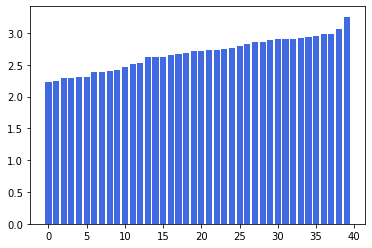

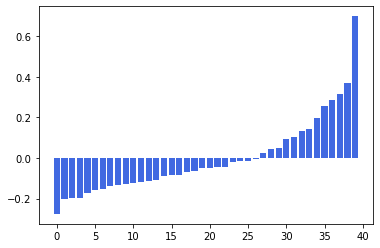

In [ ]:
fig, ax = plt.subplots()

ax.bar(x=range(40), height=sorted(weight), color='royalblue')

fig.show()

fig, ax = plt.subplots()

ax.bar(x=range(40), height=sorted(bias), color='royalblue')

fig.show()

In [ ]:
res = []
gammas = []

for fn in fns[:1]:
    
    os.chdir('/home/giampaolo/facil-tc/src/')

    base_model = torch.load(fn, map_location='cpu')
    ts = fn.split('-')[-1].replace('.ckpt', '')
    args = json.loads(open(results_path + exp_dir + 'args-%s.txt' % ts).read())
    stdout = open(results_path + exp_dir + 'stdout-%s.txt' % ts).readlines()

    utils.seed_everything(seed=args['seed'])

    os.chdir('datasets/')
    trn_load, val_load, tst_load, taskcla = get_loaders(
        datasets=args['datasets'], num_tasks=args['num_tasks'], nc_first_task=args['nc_first_task'],
        nc_incr_tasks=args['nc_incr_tasks'], batch_size=args['batch_size'], num_workers=args['num_workers'],
        pin_memory=args['pin_memory'], validation=.1, num_bytes=args['num_bytes'],
        num_pkts=args['num_pkts'], fields=args['fields'], seed=args['seed'], shots=-1,
        fseed=-1, last_class=args['last_class'], predict_tasks=False,
        statistical=False, is_ml=False)
    os.chdir('../')
    
    true = np.concatenate([tl.dataset.labels for tl in tst_load])
    
    # oldweight = np.linalg.norm(base_model['heads.0.weight'].numpy(), axis=1)
    # newweight = np.linalg.norm(base_model['heads.1.weight'].numpy(), axis=1)
    oldweight = np.mean(base_model['heads.0.weight'].numpy(), axis=1)
    newweight = np.mean(base_model['heads.1.weight'].numpy(), axis=1)
    gamma = np.mean(oldweight) / np.mean(newweight)
    gammas.append(gamma)
    
    for lamb in np.linspace(-1, 1, 21):

        wa_model = copy(base_model)
        print(np.percentile(wa_model['heads.1.weight'].numpy(), [0,100]))
        wa_model['heads.1.weight'] = wa_model['heads.1.weight'] * lamb
        print(np.percentile(wa_model['heads.1.weight'].numpy(), [0, 100]))

        model = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)

        net = LLL_Net(model, remove_existing_head=True, modality='all', activate_features=True)
        net.add_head(num_outputs=39)
        net.add_head(num_outputs=1)
        net.load_state_dict(wa_model)

        net.eval()
        preds = torch.concat(net(torch.Tensor(np.concatenate([tl.dataset.images for tl in tst_load]))), axis=1)
        preds = np.array([p.detach().numpy() for p in preds]).argmax(-1)
        precision, recall, fscore, support = precision_recall_fscore_support(true, preds)

        for m in ['precision', 'recall', 'fscore']:
            res.append(
                {'x': lamb,
                 'y': np.mean(globals()[m][:39]) * 100,
                 'metric': m,
                 'type': 'old',
                 'seed': args['last_class']
                }
            )
            res.append(
                {'x': lamb,
                 'y': np.mean(globals()[m][39]) * 100,
                 'metric': m,
                 'type': 'new',
                 'seed': args['last_class']
                }
            )
            res.append(
                {'x': lamb,
                 'y': np.mean(globals()[m]) * 100,
                 'metric': m,
                 'type': 'all',
                 'seed': args['last_class']
                }
            )

df = pd.DataFrame(data=res, columns=['x', 'y', 'metric', 'type', 'seed'])


Class order:  [10, 26, 12, 23, 21, 7, 27, 17, 35, 1, 36, 30, 25, 3, 13, 9, 34, 19, 18, 2, 15, 16, 39, 6, 11, 24, 20, 32, 37, 31, 33, 28, 14, 5, 8, 29, 38, 4, 22, 0]
[-0.06841715  0.35339439]
[-0.35339439  0.06841715]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.31805494  0.06157544]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.28271553  0.05473372]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.24737607  0.04789201]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.21203664  0.04105029]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.17669719  0.03420858]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.14135776  0.02736686]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.10601832  0.02052515]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.07067888  0.01368343]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.03533944  0.00684172]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[0. 0.]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.00684172  0.03533944]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.01368343  0.07067888]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.02052515  0.10601832]
same


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[-0.06841715  0.35339439]
[-0.02736686  0.14135776]
same
[-0.06841715  0.35339439]
[-0.03420858  0.17669719]
same
[-0.06841715  0.35339439]
[-0.04105029  0.21203664]
same
[-0.06841715  0.35339439]
[-0.04789201  0.24737607]
same
[-0.06841715  0.35339439]
[-0.05473372  0.28271553]
same
[-0.06841715  0.35339439]
[-0.06157544  0.31805494]
same
[-0.06841715  0.35339439]
[-0.06841715  0.35339439]
same


In [ ]:
mean_gamma = np.mean(gammas)
std_gamma = np.std(gammas)

best_lambdas = []
for seed in sorted(set(df['seed'].values)):
    xs = df.loc[(df['metric'] == 'fscore') & (df['type'] == 'all') & (df['seed'] == seed), 'x'].values
    ys = df.loc[(df['metric'] == 'fscore') & (df['type'] == 'all') & (df['seed'] == seed), 'y'].values
    best_lamb = xs[np.argmax(ys)]
    best_lambdas.append(best_lamb)
mean_best_lamb = np.mean(best_lambdas)
std_best_lamb = np.std(best_lambdas)

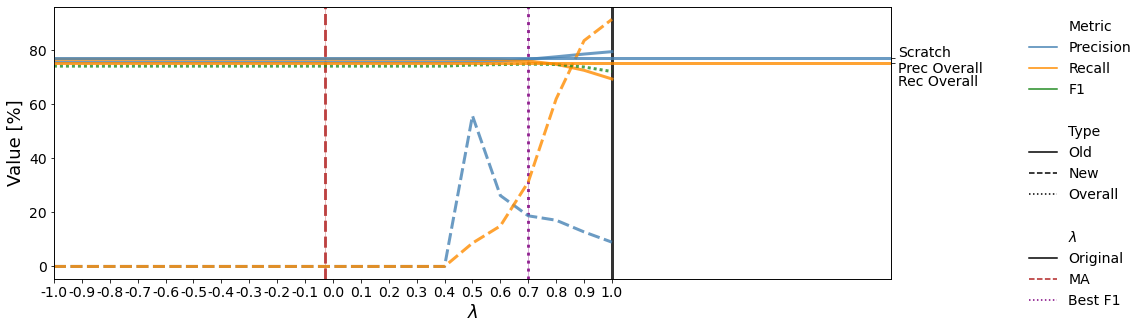

In [ ]:
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(15, 5))

ax.axvline(mean_gamma, lw=3, c='firebrick', ls='--', alpha=.8)
ax.axvspan(mean_gamma - std_gamma, mean_gamma + std_gamma, color='firebrick', alpha=.3)
ax.axvline(1, lw=3, c='k', ls='-', alpha=.8)
ax.axvline(mean_best_lamb, lw=3, c='purple', ls=':', alpha=.8)
ax.axvspan(mean_best_lamb - std_best_lamb, mean_best_lamb + std_best_lamb, color='purple', alpha=.3)

sns.lineplot(data=df[
    ((df['type'].isin(['new', 'old'])) & df['metric'].isin(['precision', 'recall'])) |
    (df['type'].isin(['all']) & df['metric'].isin(['fscore']))
], x='x', y='y', hue='metric', style='type', lw=3, ax=ax, alpha=.8, legend=False,
             palette=['steelblue', 'darkorange', 'forestgreen'])
ax.set_xlabel('$\lambda$', fontsize=18)
ax.set_ylabel('Value [%]', fontsize=18)
ax.set_xticks(sorted(set(df['x'].values)))
ax.set_xticklabels(['%.1f' % v for v in sorted(set(df['x'].values))])
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(left=-1, right=2)

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.axhline(scratch_precision_all, lw=3, c='steelblue', ls='-', alpha=.8)
# ax2.axhline(mean_scratch_precision_old, lw=3, c='steelblue', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_precision_old - std_scratch_precision_old,
#     mean_scratch_precision_old + std_scratch_precision_old,
#     color='steelblue', alpha=.3)
# ax2.axhline(mean_scratch_precision_new, lw=3, c='steelblue', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_precision_new - std_scratch_precision_new,
#     mean_scratch_precision_new + std_scratch_precision_new,
#     color='steelblue', alpha=.3)
ax2.axhline(scratch_recall_all, lw=3, c='darkorange', ls='-', alpha=.8)
# ax2.axhline(mean_scratch_recall_old, lw=3, c='darkorange', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_recall_old - std_scratch_recall_old,
#     mean_scratch_recall_old + std_scratch_recall_old,
#     color='darkorange', alpha=.3)
# ax2.axhline(mean_scratch_recall_new, lw=3, c='darkorange', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_recall_new - std_scratch_recall_new,
#     mean_scratch_recall_new + std_scratch_recall_new,
#     color='darkorange', alpha=.3)
# ax2.axhline(scratch_fscore_all, lw=3, c='forestgreen', ls='-', alpha=.8)
ax2.set_yticks([scratch_precision_all, scratch_recall_all])
ax2.set_yticklabels(['Scratch\nPrec Overall', '\n\nRec Overall'])
ax2.tick_params(axis='y', labelsize=14)

empty_handle = Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)
handles = [
#     Line2D([0], [0], color='k'),
    empty_handle,
    Line2D([0], [0], color='steelblue'),
    Line2D([0], [0], color='darkorange'),
    Line2D([0], [0], color='forestgreen'),
    empty_handle,
    empty_handle,
    Line2D([0], [0], color='k'),
    Line2D([0], [0], color='k', ls='--'),
    Line2D([0], [0], color='k', ls=':'),
    empty_handle,
    empty_handle,
    Line2D([0], [0], color='k', ls='-'),
    Line2D([0], [0], color='firebrick', ls='--'),
    Line2D([0], [0], color='purple', ls=':'),
]
labels = [
#     'Scratch F1',
    'Metric', 'Precision', 'Recall', 'F1', '', 'Type', 'Old', 'New', 'Overall', '', '$\lambda$', 'Original',
    # 'WA',
    'MA',
    'Best F1']
leg = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=14)
leg.get_frame().set_linewidth(0)

plt.show()

In [7]:
from datasets.exemplars_dataset import ExemplarsDataset
from copy import deepcopy as copy

res = []
gammas = []
gammas2 = []

obw_logitss = []
nbw_logitss = []
oic_logitss = []
nic_logitss = []

for fn in fns:
    
    os.chdir('/home/giampaolo/facil-tc/src/')

    base_model = torch.load(fn.replace('task1', 'task0'), map_location='cpu')
    incr_model = torch.load(fn, map_location='cpu')
    ts = fn.split('-')[-1].replace('.ckpt', '')
    args = json.loads(open(results_path + exp_dir + 'args-%s.txt' % ts).read())
    stdout = open(results_path + exp_dir + 'stdout-%s.txt' % ts).readlines()

    utils.seed_everything(seed=args['seed'])

    os.chdir('datasets/')
    trn_load, val_load, tst_load, taskcla = get_loaders(
        datasets=args['datasets'], num_tasks=args['num_tasks'], nc_first_task=args['nc_first_task'],
        nc_incr_tasks=args['nc_incr_tasks'], batch_size=args['batch_size'], num_workers=args['num_workers'],
        pin_memory=args['pin_memory'], validation=.1, num_bytes=args['num_bytes'],
        num_pkts=args['num_pkts'], fields=args['fields'], seed=args['seed'], shots=-1,
        fseed=-1, last_class=args['last_class'], predict_tasks=False,
        statistical=False, is_ml=False)
    os.chdir('../')
    
    bmodel = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)
    bnet = LLL_Net(bmodel, remove_existing_head=True, modality='all', activate_features=True)
    bnet.add_head(num_outputs=39)
    bnet.load_state_dict(base_model)

    imodel = Lopez17CNN(num_pkts=10, num_fields=4, out_features_size=None)
    inet = LLL_Net(imodel, remove_existing_head=True, modality='all', activate_features=True)
    inet.add_head(num_outputs=39)
    inet.add_head(num_outputs=1)
    inet.load_state_dict(incr_model)

    Appr_ExemplarsDataset = ExemplarsDataset
    first_train_ds = trn_load[0].dataset
    transform, class_indices = first_train_ds.transform, first_train_ds.class_indices

    exemplars_dataset = Appr_ExemplarsDataset(
        transform, class_indices, num_exemplars=1000, num_exemplars_per_class=0, exemplar_selection='random',
        is_networking=True, base_class_index=0)

    exemplars_dataset.collect_exemplars(bnet, trn_load[0], val_load[0].dataset.transform)

    mem_load = torch.utils.data.DataLoader(trn_load[1].dataset + exemplars_dataset,
                                   batch_size=trn_load[1].batch_size,
                                   shuffle=False,
                                   num_workers=trn_load[1].num_workers,
                                   pin_memory=trn_load[1].pin_memory)
    exemplars_dataset.collect_exemplars(inet, mem_load, val_load[1].dataset.transform)

    mem_true = np.array(exemplars_dataset.labels)

    inet.eval()
    mem_logits = torch.concat(inet(torch.Tensor(exemplars_dataset.images)), axis=1).detach().numpy()        
    mem_preds = mem_logits.argmax(-1)

    old_logits = mem_logits[:, :39]
    new_logits = mem_logits[:, 39:]

    # max(old_logits) when the base sample is confused with the incr one
    obw_logits = [np.max(l) for t, p, l in zip(mem_true, mem_preds, old_logits) if p == 39 and t < 39]
    # max(new_logits) when the base sample is confused with the incr one
    nbw_logits = [np.max(l) for t, p, l in zip(mem_true, mem_preds, new_logits) if p == 39 and t < 39]
    # max(old_logits) when the incr sample is correctly classified
    oic_logits = [np.max(l) for t, p, l in zip(mem_true, mem_preds, old_logits) if p == t == 39]
    # max(new_logits) when the incr sample is correctly classified
    nic_logits = [np.max(l) for t, p, l in zip(mem_true, mem_preds, new_logits) if p == t == 39]

    obw_logitss.append(obw_logits)
    nbw_logitss.append(nbw_logits)
    oic_logitss.append(oic_logits)
    nic_logitss.append(nic_logits)

    print('max old', np.mean([np.max(l) for l in old_logits]))
    print('max new', np.mean(new_logits))

    max_obw = np.median(obw_logits)
    print('max old old wrng', max_obw)
    max_nbw = np.median(nbw_logits)
    print('max new old wrng', max_nbw)
    
    max_oic = np.median(oic_logits)
    print('max old new samples classified as new', max_oic)
    max_nic = np.median(nic_logits)
    print('max new new samples classified as new', max_nic)

    print('acc old', sum([p==t for p, t in zip(mem_preds, mem_true) if t < 39]) / sum(mem_true < 39))
    print('acc new', sum([p==t for p, t in zip(mem_preds, mem_true) if t == 39]) / sum(mem_true == 39))
    
    # this gamma reduces the gap between the new logits of old classes wrong samples and the new classes correct samples
    gammas.append(max_nbw / max_nic)
    
    # this gamma reduces the gap between the new and old logits of new classes correct samples
    gammas2.append(max_oic / max_nic)
    
    true = np.concatenate([tl.dataset.labels for tl in tst_load])
    inet.eval()
    logits = torch.concat(inet(torch.Tensor(np.concatenate([tl.dataset.images for tl in tst_load]))), axis=1).detach().numpy()
    
    for lamb in np.linspace(0, 2, 21):

        wlogits = copy(logits)
        
        wlogits[:, 39] = wlogits[:, 39] * lamb
        
        preds = wlogits.argmax(-1)
        precision, recall, fscore, support = precision_recall_fscore_support(true, preds)

        for m in ['precision', 'recall', 'fscore']:
            res.append(
                {'x': lamb,
                 'y': np.mean(globals()[m][:39]) * 100,
                 'metric': m,
                 'type': 'old',
                 'seed': args['last_class']
                }
            )
            res.append(
                {'x': lamb,
                 'y': np.mean(globals()[m][39]) * 100,
                 'metric': m,
                 'type': 'new',
                 'seed': args['last_class']
                }
            )
            res.append(
                {'x': lamb,
                 'y': np.mean(globals()[m]) * 100,
                 'metric': m,
                 'type': 'all',
                 'seed': args['last_class']
                }
            )

df_la = pd.DataFrame(data=res, columns=['x', 'y', 'metric', 'type', 'seed'])


Class order:  [10, 26, 12, 23, 21, 7, 27, 17, 35, 1, 36, 30, 25, 3, 13, 9, 34, 19, 18, 2, 15, 16, 39, 6, 11, 24, 20, 32, 37, 31, 33, 28, 14, 5, 8, 29, 38, 4, 22, 0]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 17.433739
max new 11.199143
max old old wrng 12.919431
max new old wrng 14.933183
max old new samples classified as new 13.102396
max new new samples classified as new 18.117931
acc old 0.8082051282051282
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [25, 24, 4, 5, 32, 12, 17, 38, 8, 7, 6, 16, 31, 9, 23, 26, 10, 39, 27, 19, 14, 33, 21, 13, 36, 28, 2, 11, 0, 20, 34, 22, 30, 15, 35, 29, 18, 37, 3, 1]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.135727
max new 12.162488
max old old wrng 9.337453
max new old wrng 11.71505
max old new samples classified as new 8.7551
max new new samples classified as new 13.384001
acc old 0.5938461538461538
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [13, 29, 30, 22, 25, 31, 39, 9, 36, 24, 3, 32, 33, 37, 16, 20, 12, 38, 7, 23, 27, 10, 28, 4, 21, 15, 26, 5, 1, 0, 17, 19, 6, 11, 35, 8, 14, 18, 34, 2]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.99735
max new 9.644455
max old old wrng 9.990246
max new old wrng 12.166156
max old new samples classified as new 10.611156
max new new samples classified as new 17.458082
acc old 0.8215384615384616
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [23, 2, 12, 10, 31, 24, 30, 0, 1, 17, 32, 34, 9, 15, 26, 38, 20, 36, 25, 16, 39, 11, 37, 13, 19, 28, 14, 21, 6, 29, 7, 35, 27, 8, 5, 22, 18, 4, 33, 3]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.8865595
max new 10.734645
max old old wrng 9.372104
max new old wrng 10.724281
max old new samples classified as new 9.145322
max new new samples classified as new 14.207836
acc old 0.7097435897435898
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [15, 16, 37, 0, 32, 2, 26, 18, 14, 8, 34, 13, 3, 39, 35, 23, 5, 6, 21, 36, 9, 12, 30, 25, 7, 1, 11, 19, 31, 17, 38, 22, 10, 24, 27, 29, 33, 20, 28, 4]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.82654
max new 9.625235
max old old wrng 10.221024
max new old wrng 12.036199
max old new samples classified as new 9.693842
max new new samples classified as new 14.016914
acc old 0.7753846153846153
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [3, 1, 33, 4, 14, 28, 10, 19, 7, 15, 22, 32, 25, 13, 8, 21, 27, 0, 36, 12, 20, 35, 2, 31, 6, 23, 17, 16, 30, 37, 11, 38, 24, 26, 18, 29, 34, 39, 9, 5]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 16.122469
max new 11.035663
max old old wrng 8.87373
max new old wrng 10.166835
max old new samples classified as new 16.342844
max new new samples classified as new 23.631662
acc old 0.7753846153846153
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [36, 38, 11, 4, 31, 22, 1, 17, 5, 14, 21, 16, 28, 3, 0, 12, 15, 8, 33, 25, 18, 26, 10, 39, 37, 24, 19, 32, 23, 2, 35, 20, 7, 34, 30, 13, 9, 29, 27, 6]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.2s
max old 12.767644
max new 6.792807
max old old wrng 6.9807625
max new old wrng 8.672118
max old new samples classified as new 8.354807
max new new samples classified as new 16.731676
acc old 0.8082051282051282
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [5, 20, 17, 25, 29, 26, 30, 36, 2, 13, 16, 31, 15, 21, 9, 38, 6, 35, 22, 37, 33, 34, 0, 28, 11, 24, 1, 27, 23, 3, 18, 19, 39, 12, 14, 8, 4, 32, 10, 7]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 16.580797
max new 11.430647
max old old wrng 12.6966505
max new old wrng 14.713926
max old new samples classified as new 11.407724
max new new samples classified as new 16.510582
acc old 0.764102564102564
acc new 0.84


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [33, 34, 22, 24, 0, 20, 9, 19, 38, 32, 31, 14, 3, 23, 6, 35, 11, 10, 7, 28, 39, 36, 25, 30, 29, 2, 37, 26, 27, 21, 16, 12, 17, 13, 18, 1, 15, 5, 4, 8]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 16.195864
max new 13.747154
max old old wrng 11.952193
max new old wrng 14.538656
max old new samples classified as new 14.304375
max new new samples classified as new 22.320702
acc old 0.6533333333333333
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [8, 16, 6, 10, 2, 25, 14, 30, 34, 5, 19, 13, 18, 31, 29, 11, 28, 15, 35, 4, 38, 36, 37, 7, 32, 27, 33, 21, 39, 24, 22, 0, 12, 23, 1, 3, 20, 17, 26, 9]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.413335
max new 12.141697
max old old wrng 9.11408
max new old wrng 11.330587
max old new samples classified as new 8.13013
max new new samples classified as new 12.277705
acc old 0.5866666666666667
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [21, 19, 25, 2, 18, 28, 24, 4, 39, 8, 30, 20, 7, 5, 33, 11, 37, 3, 17, 6, 13, 15, 14, 26, 35, 9, 0, 29, 1, 36, 23, 16, 31, 32, 12, 22, 34, 38, 27, 10]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 12.670303
max new 9.139156
max old old wrng 8.553696
max new old wrng 10.551918
max old new samples classified as new 8.65794
max new new samples classified as new 12.195642
acc old 0.6953846153846154
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [6, 33, 13, 29, 27, 17, 38, 5, 34, 9, 30, 1, 0, 14, 37, 28, 4, 23, 15, 35, 20, 24, 25, 10, 21, 31, 22, 3, 12, 19, 7, 8, 18, 2, 39, 36, 26, 16, 32, 11]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.326334
max new 6.433016
max old old wrng 8.21371
max new old wrng 10.067296
max old new samples classified as new 9.552151
max new new samples classified as new 13.406639
acc old 0.8441025641025641
acc new 0.8


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [8, 14, 3, 36, 31, 30, 5, 29, 38, 33, 26, 11, 20, 6, 10, 39, 21, 32, 23, 18, 22, 27, 24, 0, 9, 7, 2, 15, 13, 16, 17, 34, 37, 19, 4, 25, 28, 1, 35, 12]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.804486
max new 8.747338
max old old wrng 7.9998255
max new old wrng 9.990331
max old new samples classified as new 9.133346
max new new samples classified as new 12.429456
acc old 0.8276923076923077
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [12, 16, 6, 38, 30, 24, 21, 4, 11, 31, 10, 33, 28, 26, 37, 18, 0, 20, 7, 9, 17, 8, 22, 23, 5, 35, 29, 3, 2, 15, 14, 39, 25, 1, 32, 19, 34, 27, 36, 13]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.61725
max new 8.847439
max old old wrng 8.950232
max new old wrng 10.44438
max old new samples classified as new 9.624035
max new new samples classified as new 13.423662
acc old 0.798974358974359
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [25, 39, 5, 28, 0, 36, 8, 20, 3, 26, 4, 9, 30, 29, 23, 24, 16, 15, 19, 13, 21, 6, 10, 22, 35, 38, 33, 32, 1, 2, 18, 31, 34, 27, 12, 11, 17, 37, 7, 14]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.190141
max new 7.845863
max old old wrng 10.194122
max new old wrng 11.469084
max old new samples classified as new 12.988483
max new new samples classified as new 19.139668
acc old 0.7907692307692308
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [24, 31, 5, 13, 4, 30, 6, 8, 7, 32, 20, 25, 0, 11, 16, 21, 1, 3, 38, 23, 27, 10, 19, 35, 9, 33, 39, 36, 34, 14, 17, 37, 18, 26, 12, 22, 28, 2, 29, 15]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.912217
max new 9.411261
max old old wrng 7.81063
max new old wrng 9.68468
max old new samples classified as new 7.6856174
max new new samples classified as new 12.462245
acc old 0.7671794871794871
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [26, 13, 35, 28, 30, 21, 11, 33, 17, 9, 19, 29, 36, 14, 18, 4, 37, 0, 32, 2, 12, 31, 25, 27, 3, 22, 5, 8, 39, 1, 7, 24, 34, 23, 38, 6, 10, 20, 15, 16]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 12.972779
max new 10.35051
max old old wrng 9.108931
max new old wrng 10.785269
max old new samples classified as new 15.780588
max new new samples classified as new 23.431007
acc old 0.6410256410256411
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [18, 24, 21, 8, 9, 34, 19, 36, 32, 33, 35, 23, 0, 22, 31, 15, 2, 12, 26, 1, 5, 3, 4, 25, 27, 7, 29, 16, 39, 20, 11, 37, 13, 10, 6, 38, 14, 28, 30, 17]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 15.471804
max new 12.292109
max old old wrng 10.727894
max new old wrng 13.149587
max old new samples classified as new 10.315152
max new new samples classified as new 16.466074
acc old 0.6994871794871795
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [12, 26, 24, 11, 16, 39, 14, 1, 0, 8, 22, 38, 9, 2, 21, 28, 30, 23, 27, 4, 20, 32, 19, 10, 33, 37, 6, 5, 31, 35, 34, 17, 3, 36, 7, 29, 25, 15, 13, 18]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.2s
max old 15.9597845
max new 8.299238
max old old wrng 13.672977
max new old wrng 16.088879
max old new samples classified as new 11.827416
max new new samples classified as new 17.442595
acc old 0.837948717948718
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [5, 18, 7, 28, 14, 22, 26, 4, 2, 3, 16, 0, 38, 39, 31, 10, 32, 35, 29, 13, 1, 34, 33, 30, 11, 37, 36, 6, 9, 20, 15, 23, 17, 25, 24, 27, 8, 21, 12, 19]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 15.139644
max new 12.678236
max old old wrng 11.56846
max new old wrng 13.793823
max old new samples classified as new 10.537674
max new new samples classified as new 15.382388
acc old 0.6102564102564103
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [15, 21, 38, 25, 2, 30, 7, 39, 10, 36, 24, 35, 32, 26, 8, 19, 28, 23, 33, 0, 11, 16, 13, 17, 29, 31, 22, 4, 18, 14, 37, 5, 27, 3, 12, 6, 34, 1, 9, 20]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 12.985434
max new 9.4683
max old old wrng 8.167536
max new old wrng 9.5998
max old new samples classified as new 8.5242
max new new samples classified as new 12.062115
acc old 0.7076923076923077
acc new 0.92


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [11, 20, 14, 2, 4, 23, 36, 35, 3, 22, 8, 6, 33, 7, 25, 16, 1, 15, 26, 31, 5, 13, 28, 38, 24, 34, 32, 17, 0, 12, 37, 39, 18, 27, 19, 9, 10, 30, 29, 21]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 12.964005
max new 10.650152
max old old wrng 9.046028
max new old wrng 11.022977
max old new samples classified as new 9.259224
max new new samples classified as new 14.787311
acc old 0.6553846153846153
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [0, 3, 9, 17, 23, 25, 2, 16, 13, 35, 32, 37, 21, 24, 10, 33, 11, 36, 26, 34, 28, 14, 19, 27, 4, 18, 1, 7, 39, 12, 30, 8, 31, 6, 29, 5, 38, 20, 15, 22]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 15.843483
max new 10.353412
max old old wrng 12.035993
max new old wrng 14.672472
max old new samples classified as new 12.586557
max new new samples classified as new 19.303587
acc old 0.8051282051282052
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [36, 14, 18, 17, 21, 6, 27, 4, 39, 31, 26, 13, 38, 10, 11, 33, 20, 30, 3, 34, 12, 22, 15, 5, 35, 25, 16, 9, 2, 19, 28, 0, 7, 32, 1, 37, 24, 29, 8, 23]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.070764
max new 8.814124
max old old wrng 10.72166
max new old wrng 12.590193
max old new samples classified as new 11.273982
max new new samples classified as new 17.04273
acc old 0.762051282051282
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [26, 34, 5, 25, 15, 18, 17, 27, 28, 21, 33, 23, 39, 38, 37, 2, 9, 13, 7, 29, 11, 31, 8, 32, 35, 36, 3, 12, 6, 30, 1, 10, 20, 0, 16, 14, 22, 4, 19, 24]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.418787
max new 7.625001
max old old wrng 6.3437867
max new old wrng 8.245161
max old new samples classified as new 9.566056
max new new samples classified as new 16.878372
acc old 0.7835897435897435
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [13, 19, 11, 37, 8, 3, 35, 17, 30, 36, 23, 21, 4, 2, 22, 27, 38, 16, 26, 14, 39, 24, 6, 9, 7, 10, 18, 20, 28, 5, 31, 32, 0, 12, 29, 33, 34, 1, 15, 25]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.781557
max new 8.722335
max old old wrng 8.757458
max new old wrng 10.571988
max old new samples classified as new 9.782232
max new new samples classified as new 14.218433
acc old 0.7815384615384615
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [11, 35, 24, 34, 36, 3, 21, 18, 29, 1, 4, 6, 33, 22, 37, 15, 31, 17, 0, 12, 27, 30, 19, 39, 13, 7, 5, 38, 14, 16, 9, 25, 10, 23, 32, 2, 8, 20, 28, 26]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.947209
max new 9.9649315
max old old wrng 10.102474
max new old wrng 11.385242
max old new samples classified as new 9.920834
max new new samples classified as new 14.5219345
acc old 0.7835897435897435
acc new 0.92


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [28, 29, 26, 19, 1, 5, 16, 31, 37, 15, 3, 17, 23, 21, 11, 12, 8, 4, 2, 22, 33, 9, 34, 0, 14, 10, 36, 24, 30, 20, 35, 38, 25, 39, 32, 7, 6, 18, 13, 27]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 15.076329
max new 12.318896
max old old wrng 10.794558
max new old wrng 13.099194
max old new samples classified as new 12.310511
max new new samples classified as new 16.487469
acc old 0.6605128205128206
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [36, 19, 24, 31, 5, 34, 35, 27, 17, 38, 32, 10, 11, 1, 16, 26, 6, 25, 39, 30, 0, 18, 37, 8, 7, 29, 3, 12, 9, 21, 13, 22, 2, 33, 4, 23, 14, 15, 20, 28]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.7315235
max new 7.302958
max old old wrng 9.119076
max new old wrng 10.3192425
max old new samples classified as new 8.89797
max new new samples classified as new 15.851394
acc old 0.8502564102564103
acc new 0.92


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [20, 39, 1, 32, 21, 27, 3, 2, 31, 8, 6, 16, 18, 12, 35, 14, 4, 11, 28, 34, 25, 10, 22, 33, 30, 5, 15, 26, 37, 36, 9, 38, 24, 13, 0, 7, 23, 19, 17, 29]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.728873
max new 6.7590218
max old old wrng 5.8526096
max new old wrng 7.857539
max old new samples classified as new 10.002607
max new new samples classified as new 12.244816
acc old 0.7958974358974359
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [18, 31, 26, 15, 32, 27, 6, 34, 13, 12, 19, 10, 24, 35, 22, 1, 39, 17, 16, 38, 28, 14, 5, 7, 8, 23, 2, 21, 20, 9, 11, 29, 4, 36, 25, 33, 37, 0, 3, 30]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 16.607473
max new 12.442127
max old old wrng 10.862414
max new old wrng 12.231139
max old new samples classified as new 10.79101
max new new samples classified as new 15.628396
acc old 0.7302564102564103
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [22, 23, 30, 33, 15, 13, 1, 29, 8, 10, 20, 2, 11, 18, 25, 38, 4, 17, 37, 5, 24, 9, 35, 16, 7, 0, 6, 39, 27, 32, 21, 28, 12, 26, 3, 19, 34, 14, 36, 31]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.736548
max new 9.55142
max old old wrng 7.878723
max new old wrng 9.164048
max old new samples classified as new 10.096035
max new new samples classified as new 14.175814
acc old 0.7835897435897435
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [19, 39, 9, 0, 38, 2, 37, 17, 22, 34, 18, 26, 28, 30, 6, 31, 1, 12, 13, 5, 36, 24, 21, 25, 20, 23, 16, 35, 10, 29, 27, 3, 4, 7, 11, 8, 33, 15, 14, 32]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.838875
max new 8.771291
max old old wrng 9.023781
max new old wrng 10.46793
max old new samples classified as new 8.464302
max new new samples classified as new 11.668566
acc old 0.7794871794871795
acc new 0.88


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [14, 16, 0, 15, 9, 12, 21, 38, 5, 32, 24, 18, 10, 22, 30, 6, 26, 19, 34, 35, 17, 3, 37, 1, 20, 23, 2, 27, 39, 8, 31, 28, 4, 29, 36, 25, 7, 11, 13, 33]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.248501
max new 8.812742
max old old wrng 10.522281
max new old wrng 11.8097725
max old new samples classified as new 11.106876
max new new samples classified as new 14.933015
acc old 0.8082051282051282
acc new 0.84


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [0, 12, 20, 37, 4, 1, 11, 29, 33, 25, 23, 16, 36, 38, 2, 27, 30, 24, 18, 13, 26, 22, 19, 5, 14, 3, 28, 7, 32, 6, 8, 31, 39, 35, 15, 9, 10, 17, 21, 34]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 13.492272
max new 10.20055
max old old wrng 7.939357
max new old wrng 9.313444
max old new samples classified as new 9.307431
max new new samples classified as new 12.500048
acc old 0.7148717948717949
acc new 0.96


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [38, 10, 17, 5, 30, 36, 16, 25, 12, 27, 14, 20, 6, 28, 23, 15, 11, 39, 1, 13, 4, 3, 8, 31, 0, 9, 7, 24, 26, 2, 33, 32, 18, 19, 37, 22, 21, 34, 29, 35]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.575882
max new 9.453371
max old old wrng 8.533672
max new old wrng 10.519886
max old new samples classified as new 9.608912
max new new samples classified as new 17.766945
acc old 0.7866666666666666
acc new 0.92


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [32, 11, 34, 17, 27, 25, 38, 33, 30, 35, 4, 18, 7, 31, 37, 0, 16, 8, 2, 13, 39, 6, 5, 3, 9, 20, 14, 12, 23, 26, 22, 10, 28, 29, 1, 21, 24, 19, 15, 36]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 16.094372
max new 11.188068
max old old wrng 10.466112
max new old wrng 11.923525
max old new samples classified as new 9.1334095
max new new samples classified as new 13.8037
acc old 0.7353846153846154
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [10, 38, 22, 1, 24, 20, 35, 28, 15, 11, 39, 29, 16, 0, 9, 5, 25, 26, 27, 6, 13, 36, 32, 30, 23, 3, 8, 19, 31, 18, 33, 21, 7, 17, 4, 14, 12, 2, 34, 37]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 15.065068
max new 8.844259
max old old wrng 7.710519
max new old wrng 10.196497
max old new samples classified as new 18.754
max new new samples classified as new 26.688969
acc old 0.8358974358974359
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [5, 22, 16, 17, 28, 12, 15, 29, 9, 31, 19, 37, 33, 39, 3, 21, 18, 6, 30, 24, 32, 36, 11, 1, 4, 13, 2, 20, 27, 34, 26, 7, 14, 0, 25, 10, 8, 35, 23, 38]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 14.387328
max new 11.482882
max old old wrng 10.604698
max new old wrng 12.661119
max old new samples classified as new 11.683308
max new new samples classified as new 18.644697
acc old 0.676923076923077
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

Class order:  [4, 25, 17, 33, 27, 16, 8, 32, 21, 0, 20, 34, 13, 14, 18, 11, 26, 15, 9, 31, 1, 19, 30, 3, 38, 36, 7, 12, 37, 23, 24, 2, 6, 35, 10, 28, 5, 22, 29, 39]
same
same
| Selected 1014 train exemplars, time=  0.0s
| Selected 1000 train exemplars, time=  0.0s
max old 15.0863695
max new 11.411155
max old old wrng 8.986497
max new old wrng 10.473178
max old new samples classified as new 11.60399
max new new samples classified as new 15.462173
acc old 0.7497435897435898
acc new 1.0


/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/giampaolo/.local/lib/p

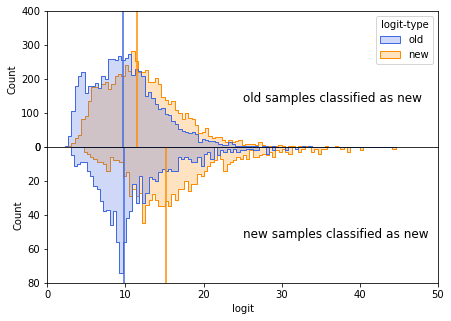

In [8]:
import seaborn as sns

df_box = pd.DataFrame(columns=['logit', 'logit-type', 'sample-type'])

df_box['logit'] = [
    vv for v in obw_logitss for vv in v] + [
        vv for v in nbw_logitss for vv in v] + [
            vv for v in oic_logitss for vv in v] + [
                vv for v in nic_logitss for vv in v]

df_box['logit-type'] = ['old'] * len([
    vv for v in obw_logitss for vv in v]) + ['new'] * len([
        vv for v in nbw_logitss for vv in v]) + ['old'] * len([
            vv for v in oic_logitss for vv in v]) + ['new'] * len([
                vv for v in nic_logitss for vv in v])

df_box['sample-type'] = ['old samples classified as new'] * len([
    vv for v in obw_logitss for vv in v]) + ['old samples classified as new'] * len([
        vv for v in nbw_logitss for vv in v]) + ['new samples classified as new'] * len([
            vv for v in oic_logitss for vv in v]) + ['new samples classified as new'] * len([
                vv for v in nic_logitss for vv in v])

fig, axes = plt.subplots(figsize=(7, 5), nrows=2)
plt.subplots_adjust(wspace=0, hspace=0)

sns.histplot(data=df_box[df_box['sample-type'] == 'old samples classified as new'], x='logit', hue='logit-type', element='step', ax=axes[0], bins=100,
    palette=['royalblue', 'darkorange'])
sns.histplot(data=df_box[df_box['sample-type'] == 'new samples classified as new'], x='logit', hue='logit-type', element='step', ax=axes[1], bins=100,
    palette=['royalblue', 'darkorange'], legend=False)

axes[0].text(25, 400 / 3, 'old samples classified as new', size=12)
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == 'old')]['logit'].median(), color='royalblue')
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == 'new')]['logit'].median(), color='darkorange')
axes[0].set_xlim(0, 50)
axes[0].set_ylim(0, 400)
axes[0].set_xticks([])

axes[1].text(25, 80 / 1.5, 'new samples classified as new', size=12)
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == 'old')]['logit'].median(), color='royalblue')
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == 'new')]['logit'].median(), color='darkorange')
axes[1].set_xlim(0, 50)
axes[1].set_ylim(0, 80)
axes[1].invert_yaxis()

plt.show()

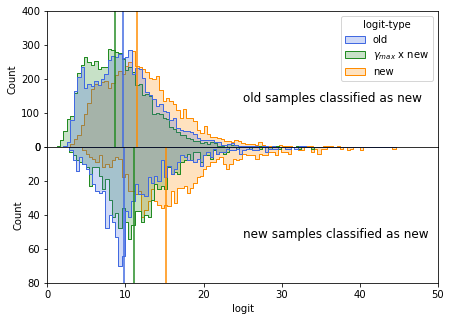

In [13]:
import seaborn as sns

df_box = pd.DataFrame(columns=['logit', 'logit-type', 'sample-type'])

df_box['logit'] = [
    vv for v in obw_logitss for vv in v] + [
        g * vv for g, v in zip(gammas, nbw_logitss) for vv in v] + [
            vv for v in oic_logitss for vv in v] + [
                g * vv for g, v in zip(gammas, nic_logitss) for vv in v] + [
                    vv for v in nbw_logitss for vv in v] + [
                        vv for v in nic_logitss for vv in v]

df_box['logit-type'] = ['old'] * len([
    vv for v in obw_logitss for vv in v]) + ['$\gamma_{max}$ x new'] * len([
        vv for v in nbw_logitss for vv in v]) + ['old'] * len([
            vv for v in oic_logitss for vv in v]) + ['$\gamma_{max}$ x new'] * len([
                vv for v in nic_logitss for vv in v]) + ['new'] * len([
                    vv for v in nbw_logitss for vv in v]) + ['new'] * len([
                        vv for v in nic_logitss for vv in v])

df_box['sample-type'] = ['old samples classified as new'] * len([
    vv for v in obw_logitss for vv in v]) + ['old samples classified as new'] * len([
        vv for v in nbw_logitss for vv in v]) + ['new samples classified as new'] * len([
            vv for v in oic_logitss for vv in v]) + ['new samples classified as new'] * len([
                vv for v in nic_logitss for vv in v]) + ['old samples classified as new'] * len([
                    vv for v in nbw_logitss for vv in v]) + ['new samples classified as new'] * len([
                        vv for v in nic_logitss for vv in v])

fig, axes = plt.subplots(figsize=(7, 5), nrows=2)
plt.subplots_adjust(wspace=0, hspace=0)

sns.histplot(data=df_box[df_box['sample-type'] == 'old samples classified as new'], x='logit', hue='logit-type', element='step', ax=axes[0], bins=100,
    palette=['royalblue', 'forestgreen', 'darkorange'])
sns.histplot(data=df_box[df_box['sample-type'] == 'new samples classified as new'], x='logit', hue='logit-type', element='step', ax=axes[1], bins=100,
    palette=['royalblue', 'forestgreen', 'darkorange'], legend=False)

axes[0].text(25, 400 / 3, 'old samples classified as new', size=12)
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == 'old')]['logit'].median(), color='royalblue')
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == 'new')]['logit'].median(), color='darkorange')
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == '$\gamma_{max}$ x new')]['logit'].median(), color='forestgreen')
axes[0].set_xlim(0, 50)
axes[0].set_ylim(0, 400)
axes[0].set_xticks([])

axes[1].text(25, 80 / 1.5, 'new samples classified as new', size=12)
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == 'old')]['logit'].median(), color='royalblue')
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == 'new')]['logit'].median(), color='darkorange')
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == '$\gamma_{max}$ x new')]['logit'].median(), color='forestgreen')
axes[1].set_xlim(0, 50)
axes[1].set_ylim(0, 80)
axes[1].invert_yaxis()

plt.show()

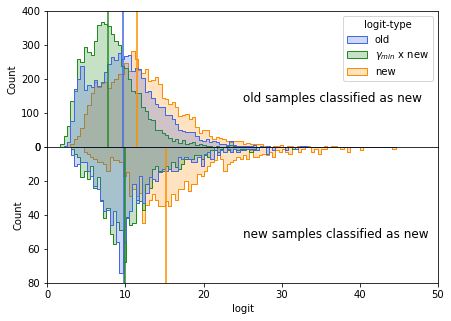

In [14]:
import seaborn as sns

df_box = pd.DataFrame(columns=['logit', 'logit-type', 'sample-type'])

df_box['logit'] = [
    vv for v in obw_logitss for vv in v] + [
        g * vv for g, v in zip(gammas2, nbw_logitss) for vv in v] + [
            vv for v in oic_logitss for vv in v] + [
                g * vv for g, v in zip(gammas2, nic_logitss) for vv in v] + [
                    vv for v in nbw_logitss for vv in v] + [
                        vv for v in nic_logitss for vv in v]

df_box['logit-type'] = ['old'] * len([
    vv for v in obw_logitss for vv in v]) + ['$\gamma_{min}$ x new'] * len([
        vv for v in nbw_logitss for vv in v]) + ['old'] * len([
            vv for v in oic_logitss for vv in v]) + ['$\gamma_{min}$ x new'] * len([
                vv for v in nic_logitss for vv in v]) + ['new'] * len([
                    vv for v in nbw_logitss for vv in v]) + ['new'] * len([
                        vv for v in nic_logitss for vv in v])

df_box['sample-type'] = ['old samples classified as new'] * len([
    vv for v in obw_logitss for vv in v]) + ['old samples classified as new'] * len([
        vv for v in nbw_logitss for vv in v]) + ['new samples classified as new'] * len([
            vv for v in oic_logitss for vv in v]) + ['new samples classified as new'] * len([
                vv for v in nic_logitss for vv in v]) + ['old samples classified as new'] * len([
                    vv for v in nbw_logitss for vv in v]) + ['new samples classified as new'] * len([
                        vv for v in nic_logitss for vv in v])

fig, axes = plt.subplots(figsize=(7, 5), nrows=2)
plt.subplots_adjust(wspace=0, hspace=0)

sns.histplot(data=df_box[df_box['sample-type'] == 'old samples classified as new'], x='logit', hue='logit-type', element='step', ax=axes[0], bins=100,
    palette=['royalblue', 'forestgreen', 'darkorange'])
sns.histplot(data=df_box[df_box['sample-type'] == 'new samples classified as new'], x='logit', hue='logit-type', element='step', ax=axes[1], bins=100,
    palette=['royalblue', 'forestgreen', 'darkorange'], legend=False)

axes[0].text(25, 400 / 3, 'old samples classified as new', size=12)
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == 'old')]['logit'].median(), color='royalblue')
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == 'new')]['logit'].median(), color='darkorange')
axes[0].axvline(df_box[(df_box['sample-type'] == 'old samples classified as new') & (df_box['logit-type'] == '$\gamma_{min}$ x new')]['logit'].median(), color='forestgreen')
axes[0].set_xlim(0, 50)
axes[0].set_ylim(0, 400)
axes[0].set_xticks([])

axes[1].text(25, 80 / 1.5, 'new samples classified as new', size=12)
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == 'old')]['logit'].median(), color='royalblue')
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == 'new')]['logit'].median(), color='darkorange')
axes[1].axvline(df_box[(df_box['sample-type'] == 'new samples classified as new') & (df_box['logit-type'] == '$\gamma_{min}$ x new')]['logit'].median(), color='forestgreen')
axes[1].set_xlim(0, 50)
axes[1].set_ylim(0, 80)
axes[1].invert_yaxis()

plt.show()

In [11]:
mean_gamma = np.mean(gammas)
std_gamma = np.std(gammas)

mean_gamma2 = np.mean(gammas2)
std_gamma2 = np.std(gammas2)

mean_avg_gamma = np.mean((np.array(gammas) + np.array(gammas2)) * .5)
std_avg_gamma = np.std((np.array(gammas) + np.array(gammas2)) * .5)

best_lambdas = []
for seed in sorted(set(df_la['seed'].values)):
    xs = df_la.loc[(df_la['metric'] == 'fscore') & (df_la['type'] == 'all') & (df_la['seed'] == seed), 'x'].values
    ys = df_la.loc[(df_la['metric'] == 'fscore') & (df_la['type'] == 'all') & (df_la['seed'] == seed), 'y'].values
    best_lamb = xs[np.argmax(ys)]
    best_lambdas.append(best_lamb)
mean_best_lamb = np.mean(best_lambdas)
std_best_lamb = np.std(best_lambdas)

NameError: name 'scratch_precision_all' is not defined

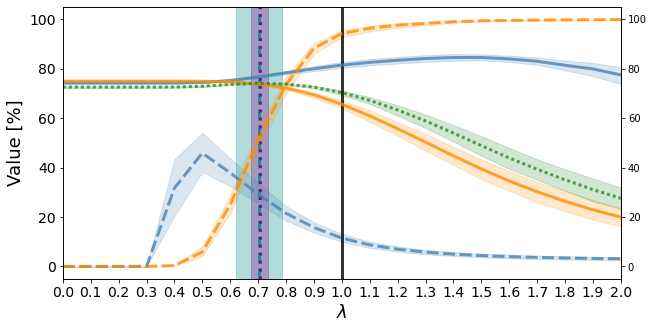

In [12]:
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

fig, ax = plt.subplots(figsize=(10, 5))

# ax.axvline(mean_gamma, lw=3, c='firebrick', ls='--', alpha=.8)
# ax.axvspan(mean_gamma - std_gamma, mean_gamma + std_gamma, color='firebrick', alpha=.3)
# ax.axvline(mean_gamma2, lw=3, c='darkcyan', ls='--', alpha=.8)
# ax.axvspan(mean_gamma2 - std_gamma2, mean_gamma2 + std_gamma2, color='darkcyan', alpha=.3)

ax.axvline(mean_avg_gamma, lw=3, c='darkcyan', ls='--', alpha=.8)
ax.axvspan(mean_avg_gamma - std_avg_gamma, mean_avg_gamma + std_avg_gamma, color='darkcyan', alpha=.3)

ax.axvline(1, lw=3, c='k', ls='-', alpha=.8)
ax.axvline(mean_best_lamb, lw=3, c='purple', ls=':', alpha=.8)
ax.axvspan(mean_best_lamb - std_best_lamb, mean_best_lamb + std_best_lamb, color='purple', alpha=.3)

sns.lineplot(data=df_la[
    ((df_la['type'].isin(['new', 'old'])) & df_la['metric'].isin(['precision', 'recall'])) |
    (df_la['type'].isin(['all']) & df_la['metric'].isin(['fscore']))
], x='x', y='y', hue='metric', style='type', lw=3, ax=ax, alpha=.8, legend=False,
             palette=['steelblue', 'darkorange', 'forestgreen'])
ax.set_xlabel('$\lambda$', fontsize=18)
ax.set_ylabel('Value [%]', fontsize=18)
ax.set_xticks(sorted(set(df_la['x'].values)))
ax.set_xticklabels(['%.1f' % v for v in sorted(set(df_la['x'].values))])
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(left=0, right=2)

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.axhline(scratch_precision_all, lw=3, c='steelblue', ls='-', alpha=.8)
# ax2.axhline(mean_scratch_precision_old, lw=3, c='steelblue', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_precision_old - std_scratch_precision_old,
#     mean_scratch_precision_old + std_scratch_precision_old,
#     color='steelblue', alpha=.3)
# ax2.axhline(mean_scratch_precision_new, lw=3, c='steelblue', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_precision_new - std_scratch_precision_new,
#     mean_scratch_precision_new + std_scratch_precision_new,
#     color='steelblue', alpha=.3)
ax2.axhline(scratch_recall_all, lw=3, c='darkorange', ls='-', alpha=.8)
# ax2.axhline(mean_scratch_recall_old, lw=3, c='darkorange', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_recall_old - std_scratch_recall_old,
#     mean_scratch_recall_old + std_scratch_recall_old,
#     color='darkorange', alpha=.3)
# ax2.axhline(mean_scratch_recall_new, lw=3, c='darkorange', ls='-', alpha=.8)
# ax2.axhspan(
#     mean_scratch_recall_new - std_scratch_recall_new,
#     mean_scratch_recall_new + std_scratch_recall_new,
#     color='darkorange', alpha=.3)
# ax2.axhline(scratch_fscore_all, lw=3, c='forestgreen', ls='-', alpha=.8)
ax2.set_yticks([scratch_precision_all, scratch_recall_all])
ax2.set_yticklabels(['Scratch\nPrec Overall', '\n\nRec Overall'])
ax2.tick_params(axis='y', labelsize=14)

empty_handle = Rectangle((0,0), 1, 1, fill=False, edgecolor='none', visible=False)
handles = [
#     Line2D([0], [0], color='k'),
    empty_handle,
    Line2D([0], [0], color='steelblue'),
    Line2D([0], [0], color='darkorange'),
    Line2D([0], [0], color='forestgreen'),
    empty_handle,
    empty_handle,
    Line2D([0], [0], color='k'),
    Line2D([0], [0], color='k', ls='--'),
    Line2D([0], [0], color='k', ls=':'),
    empty_handle,
    empty_handle,
    Line2D([0], [0], color='k', ls='-'),
    # Line2D([0], [0], color='firebrick', ls='--'),
    Line2D([0], [0], color='darkcyan', ls='--'),
    Line2D([0], [0], color='purple', ls=':'),
]
labels = [
#     'Scratch F1',
    'Metric', 'Precision', 'Recall', 'F1', '', 'Type', 'Old', 'New', 'Overall', '', '$\lambda$',
    'Original',
    # '$\mathrm{LA}_{max}$',
    # '$\mathrm{LA}_{min}$',
    '$\mathrm{LA}_{avg}$',
    'Best F1'
]
leg = ax.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.15, 1), fontsize=14)
leg.get_frame().set_linewidth(0)

plt.show()